In [33]:
import pandas as pd
stock_data = pd.read_csv('Netflix_Dataset.csv', index_col='Date')
stock_data.head()

,Open,High,Low,Close,Volume
Date,,,,,
04-03-2019,359.72,362.25,348.04,351.04,"74,86,996"
05-03-2019,351.46,356.17,348.25,354.30,"59,37,754"
06-03-2019,353.60,359.88,351.70,359.61,"62,11,895"
07-03-2019,360.16,362.86,350.50,352.60,"61,51,331"
08-03-2019,345.75,349.92,342.47,349.60,"68,98,838"


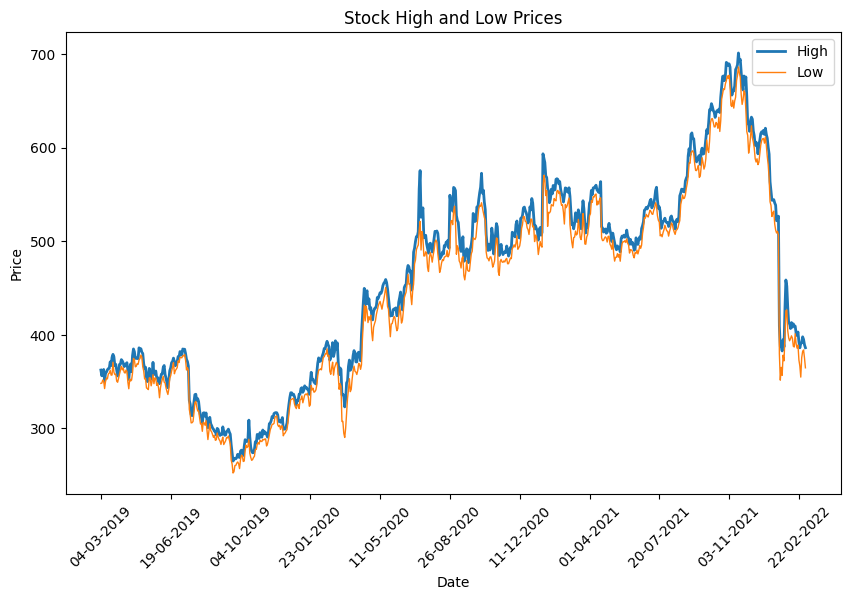

In [ ]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(stock_data['High'], label='High', linewidth=2)
plt.plot(stock_data['Low'], label='Low', linewidth=1)

# Adding labels and title
plt.title('Stock High and Low Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# Rotating the x-axis labels to avoid overlap
plt.xticks(rotation=45)

# Optionally, limit the number of x-ticks for better readability
plt.xticks(stock_data.index[::len(stock_data)//10])  # Adjust the step size based on your data size

# Show the plot
plt.show()


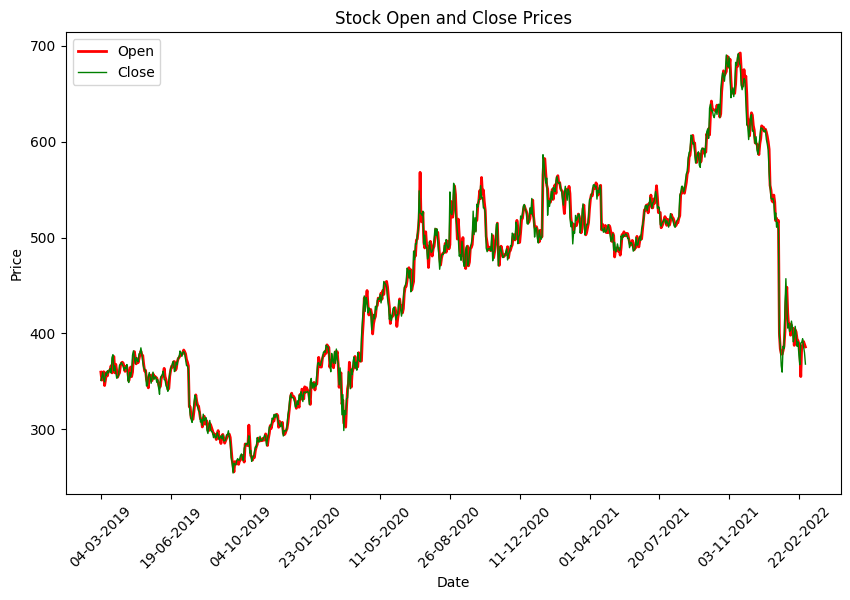

In [34]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(stock_data['Open'], label='Open', color='red', linewidth=2)
plt.plot(stock_data['Close'], label='Close', color='green', linewidth=1)

# Adding labels and title
plt.title('Stock Open and Close Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# Rotating the x-axis labels to avoid overlap
plt.xticks(rotation=45)

# Optionally, limit the number of x-ticks for better readability
plt.xticks(stock_data.index[::len(stock_data)//10])  # Adjust the step size based on your data size

# Show the plot
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
import matplotlib.pyplot as plt

In [ ]:
#Data Preprocessing

target_y = stock_data['Close']
X_feat = stock_data.iloc[:,0:3]
stock_data = stock_data[['Open', 'High', 'Low', 'Close']]

In [ ]:
#Feature Scaling
sc = StandardScaler()
stock_data_ft = sc.fit_transform(stock_data.values)
stock_data_ft = pd.DataFrame(columns=stock_data.columns,
                            data=stock_data_ft,
                            index=stock_data.index)

In [ ]:
def lstm_split(data, n_steps):
    X, y = [], []
    for i in range(len(data) - n_steps):
        # Extract a window of size `n_steps` for features
        X.append(data[i:i + n_steps, :-1])  # All but last column
        # Extract the `n_steps`-th target value
        y.append(data[i + n_steps - 1, -1])  # Target value (last column)
    return np.array(X), np.array(y)


In [ ]:
X1, y1 = lstm_split(stock_data_ft.values, n_steps=1)
train_split=0.8
split_idx= int(np.ceil(len(X1)*train_split))
date_index = stock_data_ft.index
X_train, X_test = X1[:split_idx], X1[split_idx:]
y_train, y_test = y1[:split_idx], y1[split_idx:]
X_train_date, X_test_date = date_index[:split_idx], date_index[split_idx:]

print(X1. shape, X_train. shape, X_test.shape, y_test.shape)


(757, 1, 3) (606, 1, 3) (151, 1, 3) (151,)


In [ ]:
# Define LSTM Model
lstm = Sequential()

# LSTM Layer (Set return_sequences=False if you want one output per sample)
lstm.add(LSTM(32, input_shape=(X_train.shape[1], X_train.shape[2]), activation='relu', return_sequences=True))

# Output Layer
lstm.add(Dense(1))

# Compile the Model
lstm.compile(loss='mean_squared_error', optimizer='adam')

# Print Model Summary
lstm.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 1, 32)               │           4,608 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1, 1)                │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,641 (18.13 KB)

 Trainable params: 4,641 (18.13 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = lstm.fit(X_train, y_train, epochs=100, batch_size=4, validation_split=0.2, verbose=2, shuffle=False)

Epoch 1/100
121/121 - 2s - 21ms/step - loss: 0.5482 - val_loss: 0.2231
Epoch 2/100
121/121 - 0s - 4ms/step - loss: 0.1107 - val_loss: 0.0191
Epoch 3/100
121/121 - 0s - 4ms/step - loss: 0.0133 - val_loss: 0.0087
Epoch 4/100
121/121 - 0s - 4ms/step - loss: 0.0131 - val_loss: 0.0086
Epoch 5/100
121/121 - 1s - 5ms/step - loss: 0.0130 - val_loss: 0.0087
Epoch 6/100
121/121 - 1s - 5ms/step - loss: 0.0128 - val_loss: 0.0088
Epoch 7/100
121/121 - 1s - 5ms/step - loss: 0.0127 - val_loss: 0.0089
Epoch 8/100
121/121 - 0s - 4ms/step - loss: 0.0126 - val_loss: 0.0090
Epoch 9/100
121/121 - 0s - 3ms/step - loss: 0.0125 - val_loss: 0.0091
Epoch 10/100
121/121 - 1s - 5ms/step - loss: 0.0124 - val_loss: 0.0091
Epoch 11/100
121/121 - 0s - 2ms/step - loss: 0.0124 - val_loss: 0.0091
Epoch 12/100
121/121 - 0s - 3ms/step - loss: 0.0123 - val_loss: 0.0091
Epoch 13/100
121/121 - 0s - 3ms/step - loss: 0.0123 - val_loss: 0.0090
Epoch 14/100
121/121 - 0s - 3ms/step - loss: 0.0122 - val_loss: 0.0090
Epoch 15/100
1

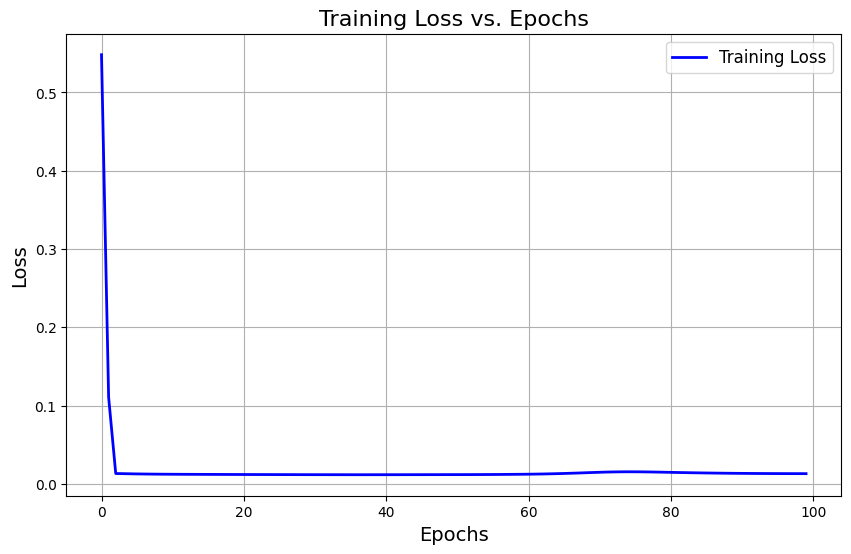

In [ ]:
# Plot the training loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue', linewidth=2)

# Annotating the plot
plt.title('Training Loss vs. Epochs', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

In [ ]:
y_pred = lstm.predict(X_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


In [ ]:
print(y_pred.shape)

(151, 1, 1)


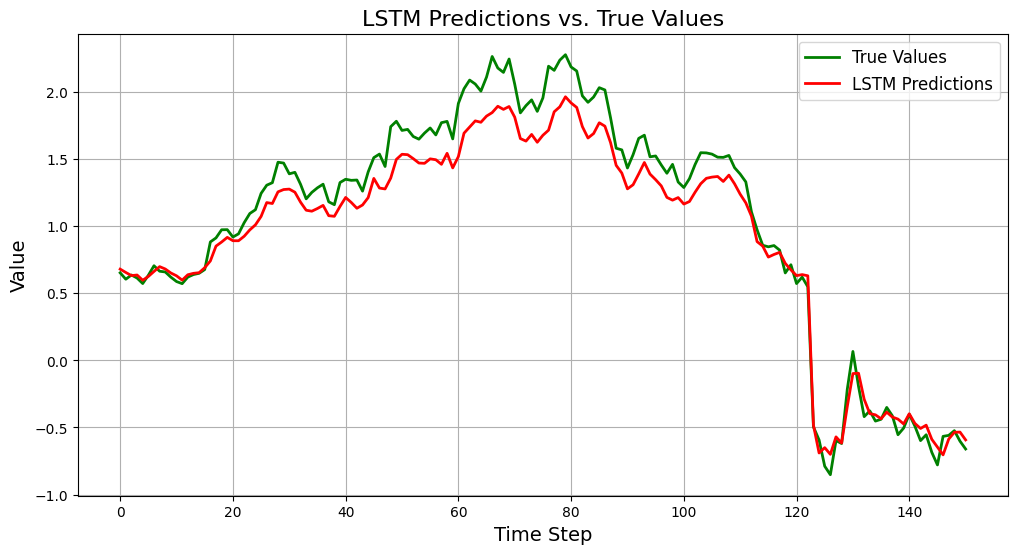

In [ ]:
#If n = 1

import matplotlib.pyplot as plt

# Ensure y_test is squeezed (flattened) if it has an extra dimension
y_test_flat = y_test.squeeze()
y_pred_flat = y_pred.squeeze()

# Plot the true values and predictions
plt.figure(figsize=(12, 6))
plt.plot(y_test_flat, label="True Values", color="green", linewidth=2)
plt.plot(y_pred_flat, label="LSTM Predictions", color="red", linewidth=2)

# Add labels, title, and legend
plt.title("LSTM Predictions vs. True Values", fontsize=16)
plt.xlabel("Time Step", fontsize=14)
plt.ylabel("Value", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)

# Show the plot
plt.show()


In [ ]:
print(y_test.shape)

(151,)


In [ ]:
mse = mean_squared_error(y_test, y_pred_flat)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred_flat)
print("RMSE: ",rmse)
print("MAPE: ", mape)

RMSE:  0.17946203714179187
MAPE:  0.12811219270508684


#Deeper LSTM with 50 units per layer


In [ ]:
lstm = Sequential()
lstm.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2]),
              activation='relu', return_sequences=True))
lstm.add(LSTM(50, activation='relu', return_sequences=True))
lstm.add(LSTM(50, activation='relu'))

lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')
lstm.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 1, 50)               │          10,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 1, 50)               │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 51,251 (200.20 KB)

 Trainable params: 51,251 (200.20 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history=lstm.fit(X_train, y_train,
                 epochs=100, batch_size=4,
                 verbose=2, shuffle=False)

Epoch 1/100
152/152 - 6s - 42ms/step - loss: 0.6655
Epoch 2/100
152/152 - 1s - 4ms/step - loss: 0.0860
Epoch 3/100
152/152 - 1s - 4ms/step - loss: 0.0164
Epoch 4/100
152/152 - 1s - 4ms/step - loss: 0.0153
Epoch 5/100
152/152 - 1s - 4ms/step - loss: 0.0145
Epoch 6/100
152/152 - 1s - 4ms/step - loss: 0.0139
Epoch 7/100
152/152 - 1s - 4ms/step - loss: 0.0132
Epoch 8/100
152/152 - 1s - 4ms/step - loss: 0.0125
Epoch 9/100
152/152 - 1s - 4ms/step - loss: 0.0117
Epoch 10/100
152/152 - 1s - 6ms/step - loss: 0.0110
Epoch 11/100
152/152 - 1s - 5ms/step - loss: 0.0104
Epoch 12/100
152/152 - 1s - 9ms/step - loss: 0.0098
Epoch 13/100
152/152 - 1s - 6ms/step - loss: 0.0093
Epoch 14/100
152/152 - 1s - 4ms/step - loss: 0.0088
Epoch 15/100
152/152 - 1s - 4ms/step - loss: 0.0083
Epoch 16/100
152/152 - 1s - 4ms/step - loss: 0.0079
Epoch 17/100
152/152 - 1s - 4ms/step - loss: 0.0076
Epoch 18/100
152/152 - 1s - 4ms/step - loss: 0.0072
Epoch 19/100
152/152 - 1s - 4ms/step - loss: 0.0069
Epoch 20/100
152/152

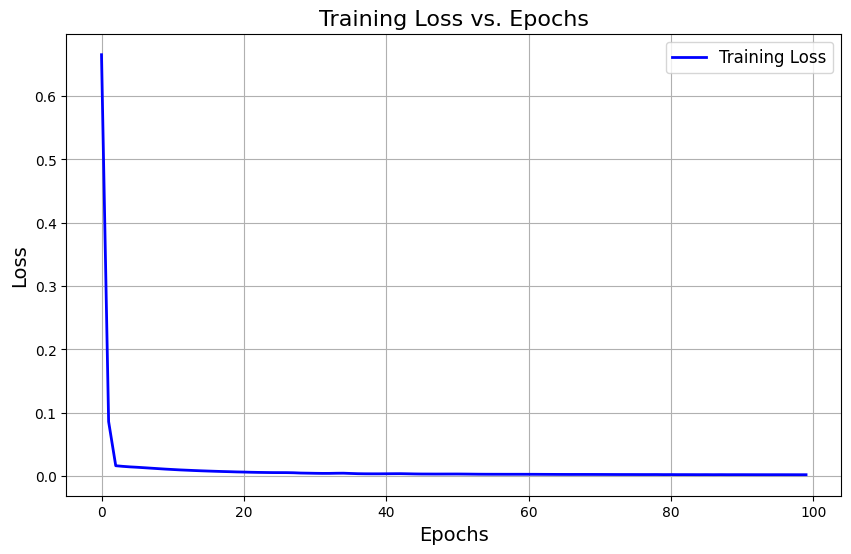

In [ ]:
# Plot the training loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue', linewidth=2)

# Annotating the plot
plt.title('Training Loss vs. Epochs', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

In [ ]:
y_pred = lstm.predict(X_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 235ms/step


In [ ]:
print(y_pred.shape)

(151, 1)


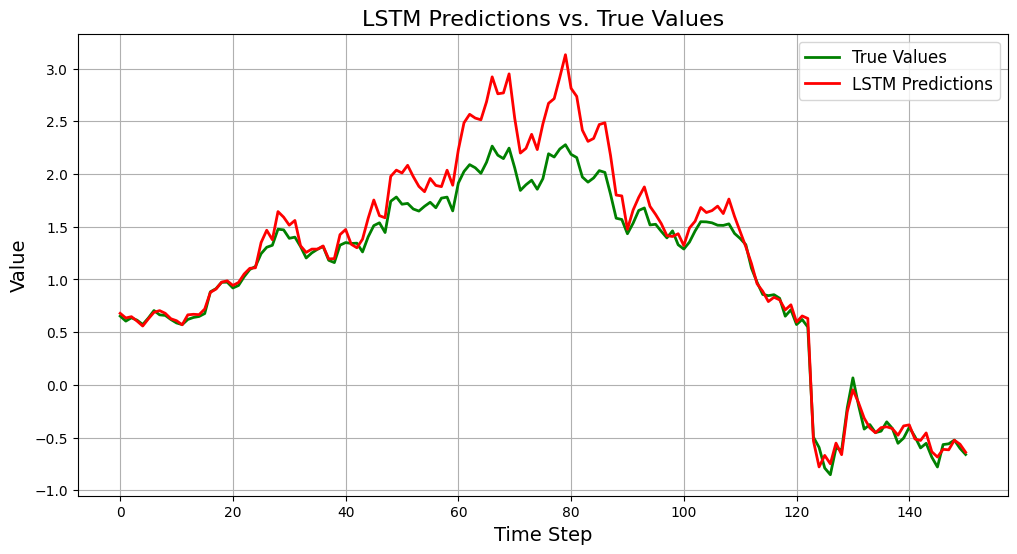

In [ ]:
import matplotlib.pyplot as plt

# Ensure y_test is squeezed (flattened) if it has an extra dimension
y_test_flat = y_test.squeeze()

# Plot the true values and predictions
plt.figure(figsize=(12, 6))
plt.plot(y_test_flat, label="True Values", color="green", linewidth=2)
plt.plot(y_pred, label="LSTM Predictions", color="red", linewidth=2)

# Add labels, title, and legend
plt.title("LSTM Predictions vs. True Values", fontsize=16)
plt.xlabel("Time Step", fontsize=14)
plt.ylabel("Value", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)

# Show the plot
plt.show()


In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)
print("RMSE: ",rmse)
print("MAPE: ", mape)

RMSE:  0.24678937220568817
MAPE:  0.11728748245410649


#Number of steps increased to 10


In [ ]:
n_steps=10
X1, y1 = lstm_split(stock_data_ft.values, n_steps=n_steps)

train_split=0.8
split_idx = int(np.ceil(len(X1)*train_split))
date_index = stock_data_ft.index

X_train, X_test = X1[:split_idx], X1[split_idx:]
y_train, y_test = y1[:split_idx], y1[split_idx:]
X_train_date, X_test_date = date_index[:split_idx], date_index[split_idx:-n_steps]

print(X1.shape, X_train.shape, X_test.shape, X_test_date.shape, y_test.shape)

(748, 10, 3) (599, 10, 3) (149, 10, 3) (149,) (149,)


In [ ]:
lstm = Sequential()
lstm.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2]),
              activation='relu', return_sequences=True))
lstm.add(LSTM(50, activation='relu', return_sequences=True))
lstm.add(LSTM(50, activation='relu'))

lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')
lstm.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                        │ (None, 10, 50)              │          10,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 10, 50)              │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 51,251 (200.20 KB)

 Trainable params: 51,251 (200.20 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history=lstm.fit(X_train, y_train,
                 epochs=100, batch_size=4,
                 verbose=2, shuffle=False)

Epoch 1/100
150/150 - 9s - 63ms/step - loss: 0.1385
Epoch 2/100
150/150 - 2s - 12ms/step - loss: 0.0763
Epoch 3/100
150/150 - 2s - 12ms/step - loss: 0.0415
Epoch 4/100
150/150 - 2s - 16ms/step - loss: 0.0360
Epoch 5/100
150/150 - 3s - 20ms/step - loss: 0.0353
Epoch 6/100
150/150 - 4s - 26ms/step - loss: 0.0336
Epoch 7/100
150/150 - 2s - 12ms/step - loss: 0.0307
Epoch 8/100
150/150 - 3s - 17ms/step - loss: 0.0272
Epoch 9/100
150/150 - 2s - 13ms/step - loss: 0.0268
Epoch 10/100
150/150 - 4s - 23ms/step - loss: 0.0232
Epoch 11/100
150/150 - 4s - 28ms/step - loss: 0.0205
Epoch 12/100
150/150 - 2s - 12ms/step - loss: 0.0186
Epoch 13/100
150/150 - 3s - 18ms/step - loss: 0.0166
Epoch 14/100
150/150 - 3s - 21ms/step - loss: 0.0147
Epoch 15/100
150/150 - 4s - 29ms/step - loss: 0.0127
Epoch 16/100
150/150 - 2s - 12ms/step - loss: 0.0107
Epoch 17/100
150/150 - 2s - 17ms/step - loss: 0.0086
Epoch 18/100
150/150 - 3s - 19ms/step - loss: 0.0087
Epoch 19/100
150/150 - 3s - 22ms/step - loss: 0.0070
Ep

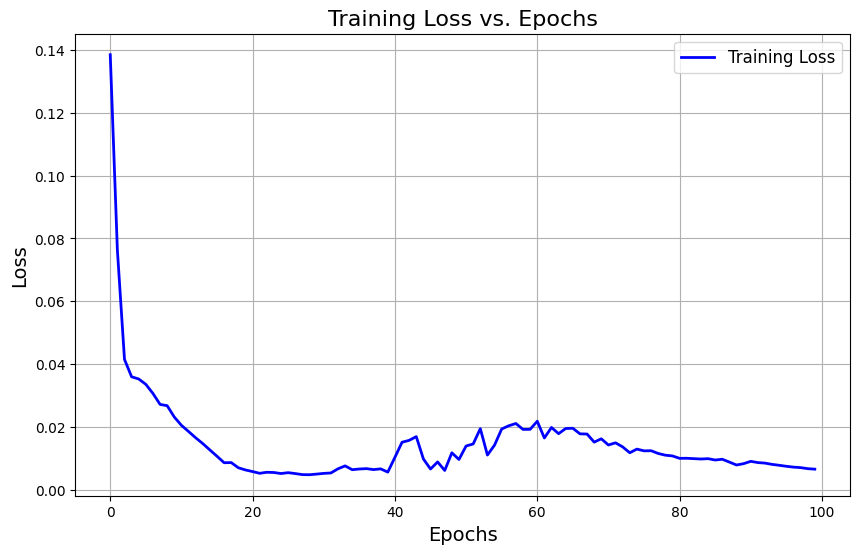

In [ ]:
# Plot the training loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue', linewidth=2)

# Annotating the plot
plt.title('Training Loss vs. Epochs', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

In [ ]:
y_pred = lstm.predict(X_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 123ms/step


In [ ]:
print(y_pred.shape)

(149, 1)


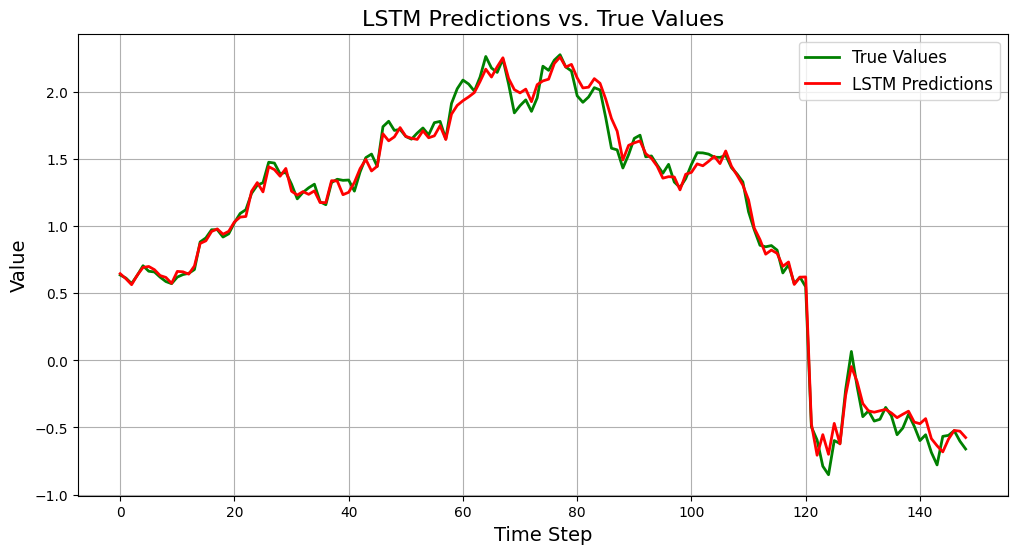

In [ ]:
import matplotlib.pyplot as plt

# Ensure y_test is squeezed (flattened) if it has an extra dimension
y_test_flat = y_test.squeeze()

# Plot the true values and predictions
plt.figure(figsize=(12, 6))
plt.plot(y_test_flat, label="True Values", color="green", linewidth=2)
plt.plot(y_pred, label="LSTM Predictions", color="red", linewidth=2)

# Add labels, title, and legend
plt.title("LSTM Predictions vs. True Values", fontsize=16)
plt.xlabel("Time Step", fontsize=14)
plt.ylabel("Value", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)

# Show the plot
plt.show()


In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)
print("RMSE: ",rmse)
print("MAPE: ", mape)

RMSE:  0.06983179501663475
MAPE:  0.06265434638945802


# Comparison with SMA and EMA

###SMA

Test RMSE: 100.354
Test MAPE: 0.163


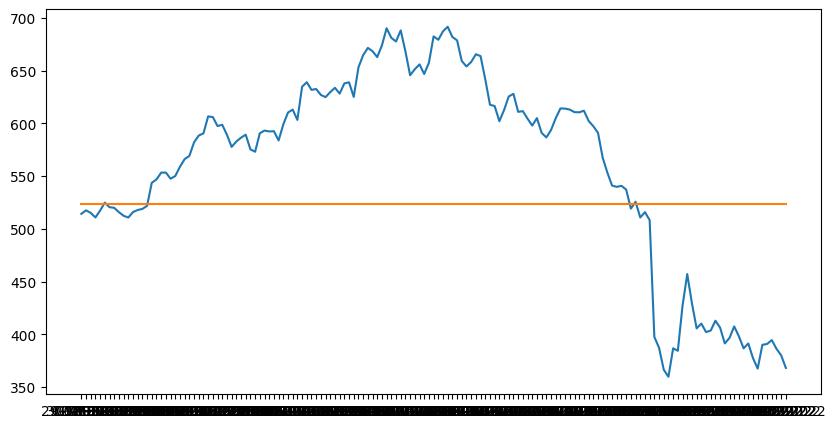

In [ ]:
train_split = 0.8
split_idx = int(np.ceil(len(stock_data)*train_split))
train = stock_data[['Close']].iloc[:split_idx]
test = stock_data[['Close']].iloc[split_idx:]

test_pred = np.array([train.rolling(10).mean().iloc[-1]]*len(test)).reshape((-1,1))

print('Test RMSE: %.3f' % np.sqrt(mean_squared_error(test, test_pred)))
print('Test MAPE: %.3f' % mean_absolute_percentage_error(test, test_pred))

plt.figure(figsize=(10,5))
plt.plot(test)
plt.plot(test_pred)
plt.show()

###EMA

/usr/local/lib/python3.11/dist-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress

Test RMSE: 100.244
Test MAPE: 0.163


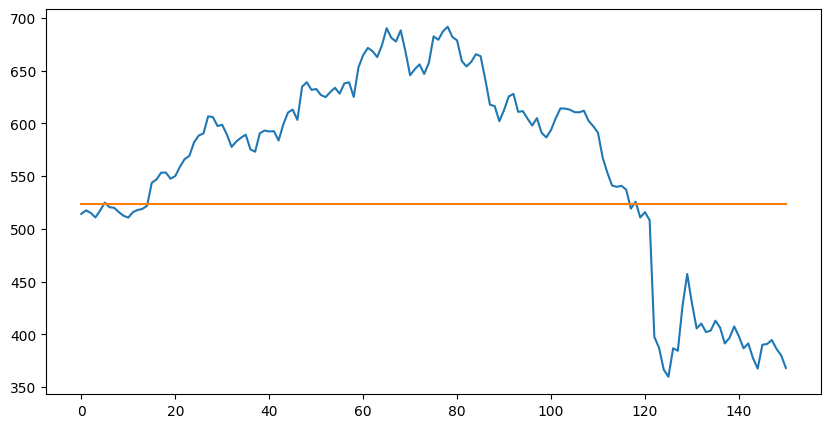

In [ ]:
from statsmodels.tsa.api import SimpleExpSmoothing

X = stock_data[['Close']].values
train_split = 0.8
split_idx = int(np.ceil(len(X)*train_split))
train = X[:split_idx]
test = X[split_idx:]
test_concat = np.array([]).reshape((0,1))

for i in range(len(test)):
  train_fit = np.concatenate((train, np.asarray(test_concat)))
  fit = SimpleExpSmoothing(np.asarray(train_fit)).fit(smoothing_level=0.1)
  test_pred = fit.forecast(1)
  test_concat = np.concatenate((np.asarray(test_concat), test_pred.reshape((-1,1))))

# The change is here: Using test_concat instead of test_pred for RMSE calculation
print('Test RMSE: %.3f' % np.sqrt(mean_squared_error(test, test_concat)))
print('Test MAPE: %.3f' % mean_absolute_percentage_error(test, test_concat))

plt.figure(figsize=(10,5))
plt.plot(test)
plt.plot(test_concat)
plt.show()

###A Different Averaging

Test RMSE: 12.672
Test MAPE: 0.019


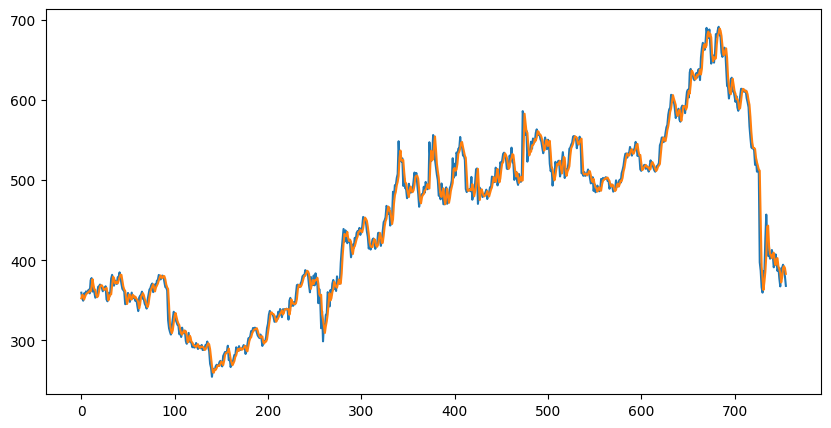

In [ ]:
X = stock_data[['Close']].values
time_steps = 2

history = [X[i] for i in range(time_steps)]
ytest = [X[i] for i in range(time_steps, len(X))]
ypred_list = []

for t in range(len(ytest)):
	ypred = np.mean([history[i] for i in range(len(history)-time_steps,len(history))])
	ypred_list.append(ypred)
	history.append(ytest[t])

print('Test RMSE: %.3f' % np.sqrt(mean_squared_error(ytest, ypred_list)))
print('Test MAPE: %.3f' % mean_absolute_percentage_error(ytest, ypred_list))

plt.figure(figsize=(10,5))
plt.plot(ytest)
plt.plot(ypred_list)
plt.show()